<a href="https://colab.research.google.com/github/Alexandr-M-85/Neural-University/blob/main/%D0%9F%D0%B5%D1%80%D0%B5%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%9D%D0%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание

Используя модуль **datasets** библиотеки **sklearn**, загрузите базу вин (`.load_wine()`).

Используя шаблон ноутбука, выполните загрузку, подготовку и предобработку данных. Обязательное условие: разделение данных на три выборки осуществляется по шаблону (изменять параметры подготовки данных запрещается)!

Проведите серию экспериментов и добейтесь максимальной точности классификации на тестовой выборке выше 98%.

---

С помощью метода `.summary()` зафиксируйте количество параметров созданной вами нейронной сети.


#Шаблон ноутбука

In [ ]:
# Последовательная модель НС
from tensorflow.keras.models import Sequential      

# Основные слои
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization 

# Утилиты для to_categorical()
from tensorflow.keras import utils    

# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam  

# Библиотека для работы с массивами
import numpy as np    

# Отрисовка графиков
import matplotlib.pyplot as plt    

# Разделение данных на выборки
from sklearn.model_selection import train_test_split 

# Для загрузки датасета
from sklearn.datasets import load_wine                     

# Отрисовка изображений в ноутбуке, а не в консоли или файле
%matplotlib inline

##Описание базы

1. Датасет состоит из набора данных о винах и их классах.
2. Данные по одному вину хранятся в numpy-массиве `x_data`: (`13` параметров).
3. В датасете `3` класса вин: `y_data`.
4. Количество примеров: `178`.

In [ ]:
x_data = load_wine()['data']              # Загрузка набора данных о винах
y_data = load_wine()['target']            # Загрузка классов вин

print('Размерность x_data -', x_data.shape)
print('Размерность y_data -', y_data.shape)
print()

# Вывод примера данных
print('Данные по первому вину:',x_data[0])
print('Класс вина:',y_data[0])

Размерность x_data - (178, 13)
Размерность y_data - (178,)

Данные по первому вину: [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
Класс вина: 0


##Подготовка данных

In [ ]:
# Перевод в one hot encoding
y_data = utils.to_categorical(y_data, 3)

# Разбиение наборов на общую и тестовую выборки
x_all, x_test, y_all, y_test = train_test_split(x_data, 
                                                y_data, 
                                                test_size=0.1, 
                                                shuffle=True, 
                                                random_state = 6)

# Разбиение общей выборки на обучающую и проверочную 
x_train, x_val, y_train, y_val = train_test_split(x_all, 
                                                  y_all, 
                                                  test_size=0.1, 
                                                  shuffle=True, 
                                                  random_state = 6)

print(x_train.shape)
print(y_train.shape)
print()
print(x_val.shape)
print(y_val.shape)

(144, 13)
(144, 3)

(16, 13)
(16, 3)


Epoch 1/100
18/18 [==============================] - 1s 13ms/step - loss: 103.7981 - accuracy: 0.3194 - val_loss: 54.5927 - val_accuracy: 0.2500
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 22.3708 - accuracy: 0.3125 - val_loss: 1.2399 - val_accuracy: 0.3125
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 4.0180 - accuracy: 0.5000 - val_loss: 1.1926 - val_accuracy: 0.5625
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 1.5922 - accuracy: 0.4306 - val_loss: 1.0416 - val_accuracy: 0.4375
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 1.2408 - accuracy: 0.4792 - val_loss: 1.5776 - val_accuracy: 0.5000
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 1.0636 - accuracy: 0.4514 - val_loss: 0.7512 - val_accuracy: 0.3750
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 0.8723 - accuracy: 0.5000 - val_loss: 0.7753 - val_accuracy: 0.5625
Epoch 8/

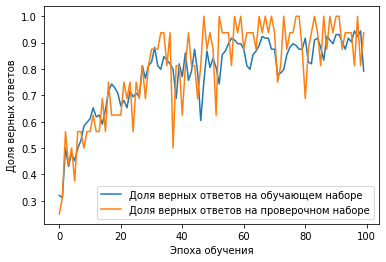

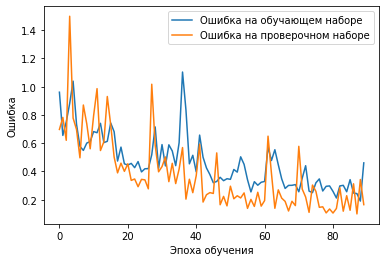

In [ ]:
# ваше решение

# Создание модели
model = Sequential()

# Добавление слоев
model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(3, activation='softmax'))

# Компиляция и возврат модели
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), 
              metrics=['accuracy'])

# обучение модели
history = model.fit(x_train, y_train, batch_size=8, epochs=100, validation_data=(x_val, y_val))

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# рисуем графики
plt.plot(history.history['loss'][10:], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'][10:], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
# Вычисление результата (предсказания) сети на тестовом наборе
scores = model.evaluate(x_test, y_test, verbose=1)

print(scores)
print('Доля верных ответов на тестовых данных, в процентах: {:7.4%}'.format(scores[1]))

1/1 [==============================] - 0s 139ms/step - loss: 0.3019 - accuracy: 0.9444
[0.30192309617996216, 0.9444444179534912]
Доля верных ответов на тестовых данных, в процентах: 94.4444%


### Слой Dropout

Epoch 1/300
18/18 [==============================] - 1s 13ms/step - loss: 126.2788 - accuracy: 0.2917 - val_loss: 74.8849 - val_accuracy: 0.3750
Epoch 2/300
18/18 [==============================] - 0s 4ms/step - loss: 57.5305 - accuracy: 0.3194 - val_loss: 19.9823 - val_accuracy: 0.2500
Epoch 3/300
18/18 [==============================] - 0s 4ms/step - loss: 34.5968 - accuracy: 0.3194 - val_loss: 11.4974 - val_accuracy: 0.2500
Epoch 4/300
18/18 [==============================] - 0s 4ms/step - loss: 28.0686 - accuracy: 0.2778 - val_loss: 4.8726 - val_accuracy: 0.4375
Epoch 5/300
18/18 [==============================] - 0s 4ms/step - loss: 20.7821 - accuracy: 0.3611 - val_loss: 2.3359 - val_accuracy: 0.6250
Epoch 6/300
18/18 [==============================] - 0s 4ms/step - loss: 16.3171 - accuracy: 0.3889 - val_loss: 2.3322 - val_accuracy: 0.5000
Epoch 7/300
18/18 [==============================] - 0s 4ms/step - loss: 17.7441 - accuracy: 0.3750 - val_loss: 2.8489 - val_accuracy: 0.5000
E

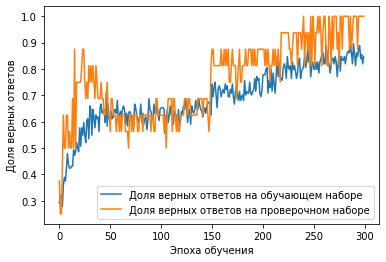

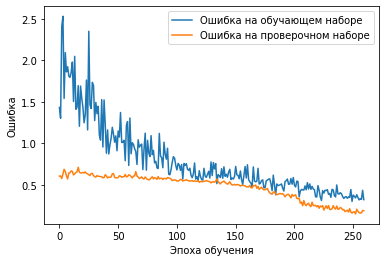

In [ ]:
# Создание модели
model = Sequential()

# Добавление слоев
model.add(Dense(16, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

# Компиляция и возврат модели
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), 
              metrics=['accuracy'])

# обучение модели
history = model.fit(x_train, y_train, batch_size=8, epochs=300, validation_data=(x_val, y_val))

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# рисуем графики
plt.plot(history.history['loss'][40:], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'][40:], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
# Вычисление результата (предсказания) сети на тестовом наборе
scores = model.evaluate(x_test, y_test, verbose=1)

print(scores)
print('Доля верных ответов на тестовых данных, в процентах: {:7.4%}'.format(scores[1]))

1/1 [==============================] - 0s 135ms/step - loss: 0.1892 - accuracy: 0.9444
[0.18921922147274017, 0.9444444179534912]
Доля верных ответов на тестовых данных, в процентах: 94.4444%


### Слой BatchNormalization

Epoch 1/50
18/18 [==============================] - 1s 15ms/step - loss: 1.1916 - accuracy: 0.3681 - val_loss: 2.8950 - val_accuracy: 0.2500
Epoch 2/50
18/18 [==============================] - 0s 5ms/step - loss: 0.9220 - accuracy: 0.5625 - val_loss: 2.1153 - val_accuracy: 0.2500
Epoch 3/50
18/18 [==============================] - 0s 5ms/step - loss: 0.8484 - accuracy: 0.6181 - val_loss: 1.7212 - val_accuracy: 0.2500
Epoch 4/50
18/18 [==============================] - 0s 5ms/step - loss: 0.7364 - accuracy: 0.7014 - val_loss: 1.4028 - val_accuracy: 0.4375
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 0.7191 - accuracy: 0.7222 - val_loss: 1.2521 - val_accuracy: 0.3750
Epoch 6/50
18/18 [==============================] - 0s 5ms/step - loss: 0.7142 - accuracy: 0.7222 - val_loss: 1.0825 - val_accuracy: 0.3750
Epoch 7/50
18/18 [==============================] - 0s 6ms/step - loss: 0.6327 - accuracy: 0.7431 - val_loss: 1.0238 - val_accuracy: 0.3750
Epoch 8/50
18/18 [=

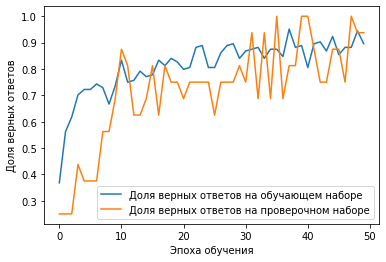

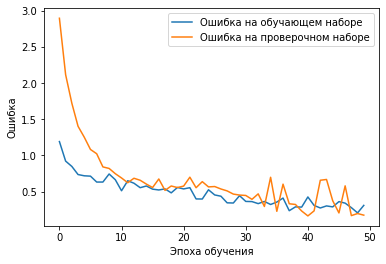

In [ ]:
# Создание модели
model = Sequential()

# Добавление слоев
model.add(Dense(16, input_dim=x_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

# Компиляция и возврат модели
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), 
              metrics=['accuracy'])

# обучение модели
history = model.fit(x_train, y_train, batch_size=8, epochs=50, validation_data=(x_val, y_val))

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# рисуем графики
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
# Вычисление результата (предсказания) сети на тестовом наборе
scores = model.evaluate(x_test, y_test, verbose=1)

print(scores)
print('Доля верных ответов на тестовых данных, в процентах: {:7.4%}'.format(scores[1]))

1/1 [==============================] - 0s 173ms/step - loss: 0.0280 - accuracy: 1.0000
[0.02804570645093918, 1.0]
Доля верных ответов на тестовых данных, в процентах: 100.0000%


### Слой Dropout и BatchNormalization

Epoch 1/150
9/9 [==============================] - 1s 29ms/step - loss: 1.5042 - accuracy: 0.3194 - val_loss: 5.6437 - val_accuracy: 0.2500
Epoch 2/150
9/9 [==============================] - 0s 6ms/step - loss: 1.2359 - accuracy: 0.4444 - val_loss: 4.1417 - val_accuracy: 0.2500
Epoch 3/150
9/9 [==============================] - 0s 6ms/step - loss: 1.1844 - accuracy: 0.4306 - val_loss: 3.2427 - val_accuracy: 0.2500
Epoch 4/150
9/9 [==============================] - 0s 7ms/step - loss: 1.0495 - accuracy: 0.5278 - val_loss: 2.6820 - val_accuracy: 0.2500
Epoch 5/150
9/9 [==============================] - 0s 6ms/step - loss: 1.0158 - accuracy: 0.5069 - val_loss: 2.3313 - val_accuracy: 0.2500
Epoch 6/150
9/9 [==============================] - 0s 6ms/step - loss: 0.8888 - accuracy: 0.5486 - val_loss: 2.0638 - val_accuracy: 0.2500
Epoch 7/150
9/9 [==============================] - 0s 6ms/step - loss: 0.8901 - accuracy: 0.5278 - val_loss: 1.8322 - val_accuracy: 0.2500
Epoch 8/150
9/9 [=========

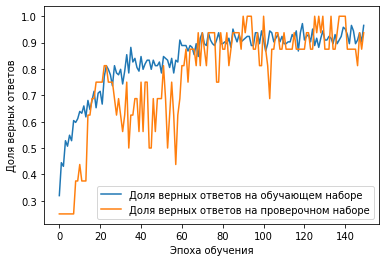

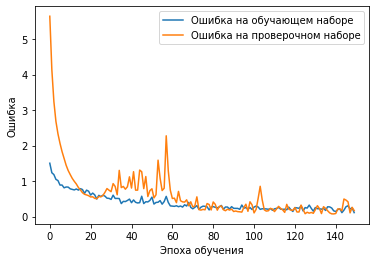

In [ ]:
# Создание модели
model = Sequential()

# Добавление слоев
model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

# Компиляция и возврат модели
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), 
              metrics=['accuracy'])

# обучение модели
history = model.fit(x_train, y_train, batch_size=16, epochs=150, validation_data=(x_val, y_val))

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# рисуем графики
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
# Вычисление результата (предсказания) сети на тестовом наборе
scores = model.evaluate(x_test, y_test, verbose=1)

print(scores)
print('Доля верных ответов на тестовых данных, в процентах: {:7.4%}'.format(scores[1]))

1/1 [==============================] - 0s 167ms/step - loss: 0.0219 - accuracy: 1.0000
[0.021905938163399696, 1.0]
Доля верных ответов на тестовых данных, в процентах: 100.0000%


In [ ]:
# архитектура модели
model.summary()

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_180 (Dense)            (None, 32)                448       
_________________________________________________________________
batch_normalization_62 (Batc (None, 32)                128       
_________________________________________________________________
dropout_71 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_181 (Dense)            (None, 16)                528       
_________________________________________________________________
activation_60 (Activation)   (None, 16)                0         
_________________________________________________________________
batch_normalization_63 (Batc (None, 16)                64        
_________________________________________________________________
dropout_72 (Dropout)         (None, 16)              

Вывод: с добавлением слоя Dropout не получилось добиться точности выше, чем без слоя Dropout. С добавлением слоя BatchNormalization удалось добиться точности 100% на проверочной выборке. С добавлением слоев Dropout и BatchNormalization также удалось добиться точности 100%.